<a href="https://colab.research.google.com/github/OfekYa/Deep-Learning/blob/main/pytorch_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implement my PyTorch layer and Train a Deep Network to predict clothing details.

In [ ]:
import torch
import pandas as pd
import math
from torch import nn
import torchvision
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt
import tqdm


# **Q1: SplitLinear**
**Sections A, B:**

**A:** 
  Implement a network layer in the following way:
* Split the input tensor (tensor size: NxM) in its center (along the dimension of the features) into two tensors of equal length (assume that M is even).
*Both tensors will be fed through the same linear aggregation layer and then passed to the RELU activation.
*Finally the halves will be concatenated in the original order to create the Y output.
The output dimension is also NxM.

**B:**
Implement a constructor of this layer, and initialize the network parameters.

In [ ]:
class SplitLinear(nn.Module):

    def __init__(self, num_of_in_features):
        super().__init__()
    
        self.K_in = int(num_of_in_features / 2)  # The input dimension
        self.K_out = int(num_of_in_features / 2)  # The output dimension
        self.linear = nn.Linear(in_features=self.K_in,
                            out_features=self.K_out,
                            bias=True)
        
        self.activation = nn.ReLU(inplace=True)
       
        """ Initializing the network parameters according to the Xavier method """
        weight_bound = math.sqrt(6 / ((self.K_in) + (self.K_out)))
        nn.init.uniform_(self.linear.weight, -weight_bound, weight_bound)

        print('bias shape: ', self.linear.bias.shape)
        print('weight shape: ', self.linear.weight.shape)
       

    def forward(self, input):  #  input tensor shape = [N x M];  M-number of features,  N-batch size
        print('\n------INPUT LAYER------:')
        print('input Tensor:\n ', input)
        print('input shape: ', input.shape)
        
        num_of_features = input.shape[1]
        if num_of_features % 2 != 0:  # check validity of the number of features.
            raise Exception('The given number of features is not valid.')
        
        tensor1, tensor2 = torch.tensor_split(input, 2, dim=1)
        print('\n------SPLIT LAYER------:')
        print('Tensor1 shape: ', tensor1.shape)
        print('Tensor1 - First Half of Input Tensor:\n ', tensor1)
        print('Tensor2 shape: ', tensor2.shape)
        print('Tensor2 - Second Half of Input Tensor:\n ', tensor2)
        if tensor1.size() != tensor2.size():
            raise Exception('The features division is not valid.')
        
        tensor1, tensor2 = self.linear(tensor1), self.linear(tensor2)
        print('\n------LINEAR LAYER------:')
        print('Linear(Tensor1) shape: ', tensor1.shape)
        print('Linear(Tensor1):\n ', tensor1)
        print('Linear(Tensor2) shape: ', tensor2.shape)
        print('Linear(Tensor2):\n ', tensor2)
        
        tensor1, tensor2 = self.activation(tensor1), self.activation(tensor2)
        print('\n------ACTIVATION LAYER------:')
        print('ReLU(Tensor1) shape: ', tensor1.shape)
        print('ReLU(Tensor1):\n ', tensor1)
        print('ReLU(Tensor2) shape: ', tensor2.shape)
        print('ReLU(Tensor2):\n ', tensor2)
        
        Y = torch.cat((tensor1, tensor2), -1)
        print('\n------OUTPUT LAYER------:')
        print('Y:', Y)
        print('Y shape: ', Y.shape)
        return Y



# **Section C:**

Create a random tensor and initialize the SplitLinear layer.

In [ ]:
N = 124  # batch size
M = 32  # number of features

rand_tensor = torch.rand(N, M)  # input tensor

model = SplitLinear(M)
print('model:', model)

y = model(rand_tensor)


bias shape:  torch.Size([16])
weight shape:  torch.Size([16, 16])
model: SplitLinear(
  (linear): Linear(in_features=16, out_features=16, bias=True)
  (activation): ReLU(inplace=True)
)

------INPUT LAYER------:
input Tensor:
  tensor([[0.8651, 0.0508, 0.6924,  ..., 0.1493, 0.2171, 0.6320],
        [0.7477, 0.5873, 0.1899,  ..., 0.0346, 0.1352, 0.1908],
        [0.4999, 0.8970, 0.9120,  ..., 0.8493, 0.3114, 0.3716],
        ...,
        [0.3754, 0.6851, 0.0219,  ..., 0.2961, 0.9898, 0.6202],
        [0.8072, 0.8378, 0.6644,  ..., 0.6627, 0.5044, 0.4290],
        [0.5697, 0.3437, 0.0912,  ..., 0.7727, 0.2574, 0.5787]])
input shape:  torch.Size([124, 32])

------SPLIT LAYER------:
Tensor1 shape:  torch.Size([124, 16])
Tensor1 - First Half of Input Tensor:
  tensor([[0.8651, 0.0508, 0.6924,  ..., 0.9391, 0.7255, 0.8717],
        [0.7477, 0.5873, 0.1899,  ..., 0.5410, 0.5349, 0.6174],
        [0.4999, 0.8970, 0.9120,  ..., 0.3754, 0.2672, 0.2273],
        ...,
        [0.3754, 0.6851, 0.02

# **Section D:**
Block diagram of the SplitLinear layer

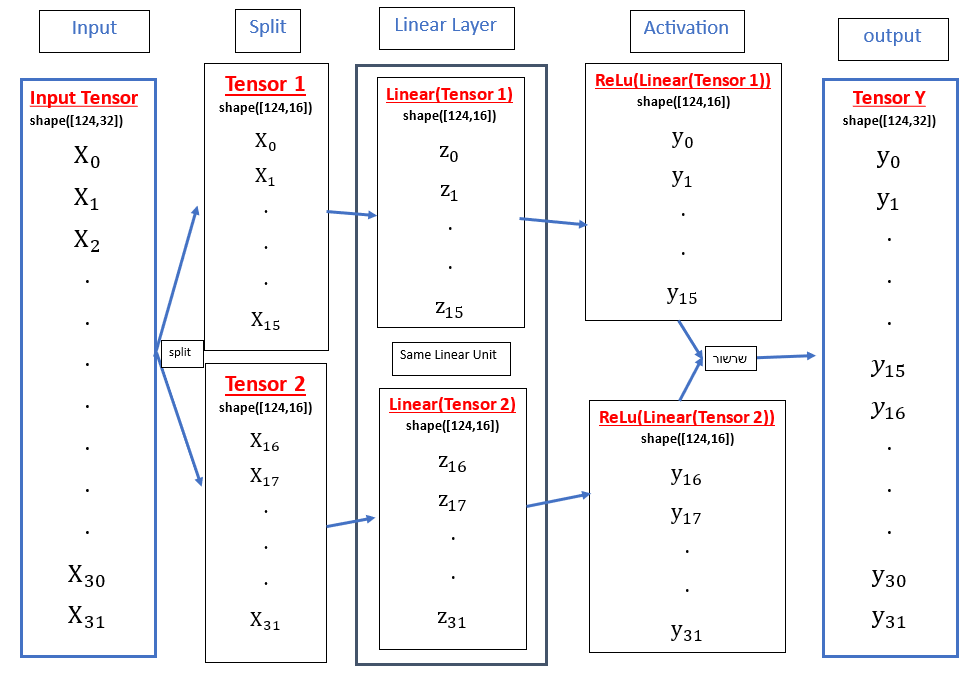


In [ ]:
pip install torchviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


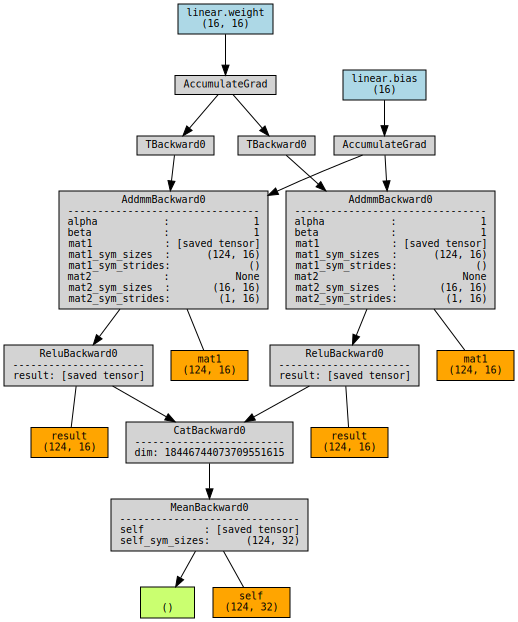

In [ ]:

from torchviz import make_dot

make_dot(y.mean(), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)


# **Section E:**
Calculate the number of parameters in the SplitLinear layer according to the initialization we defined.

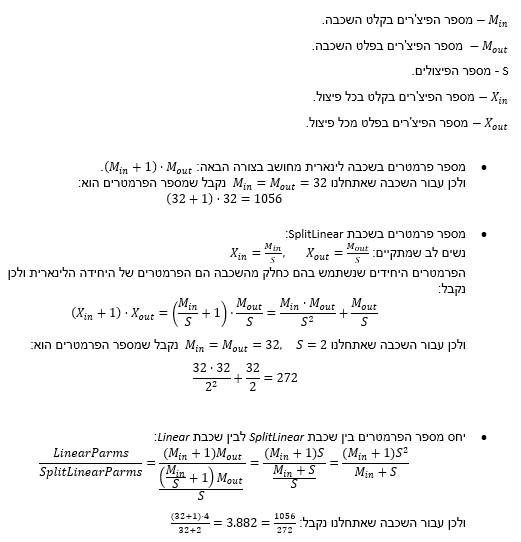

In [ ]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad:
            continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

count_parameters(model)

+---------------+------------+
|    Modules    | Parameters |
+---------------+------------+
| linear.weight |    256     |
|  linear.bias  |     16     |
+---------------+------------+
Total Trainable Params: 272


272

# **Sections F, G:**
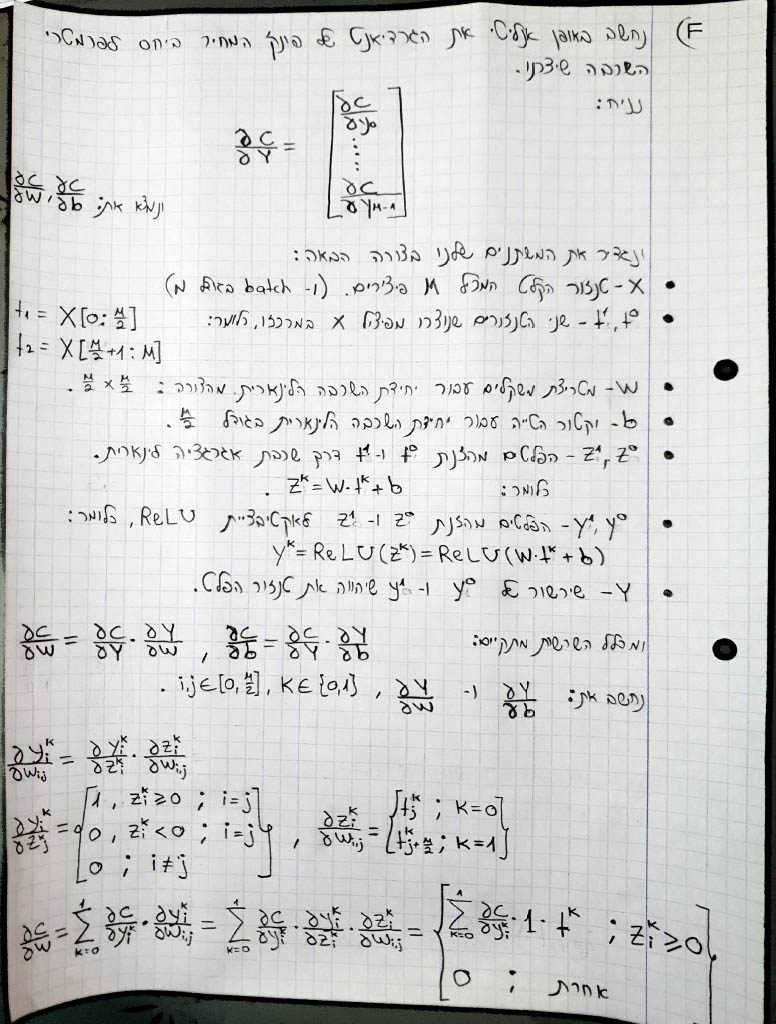


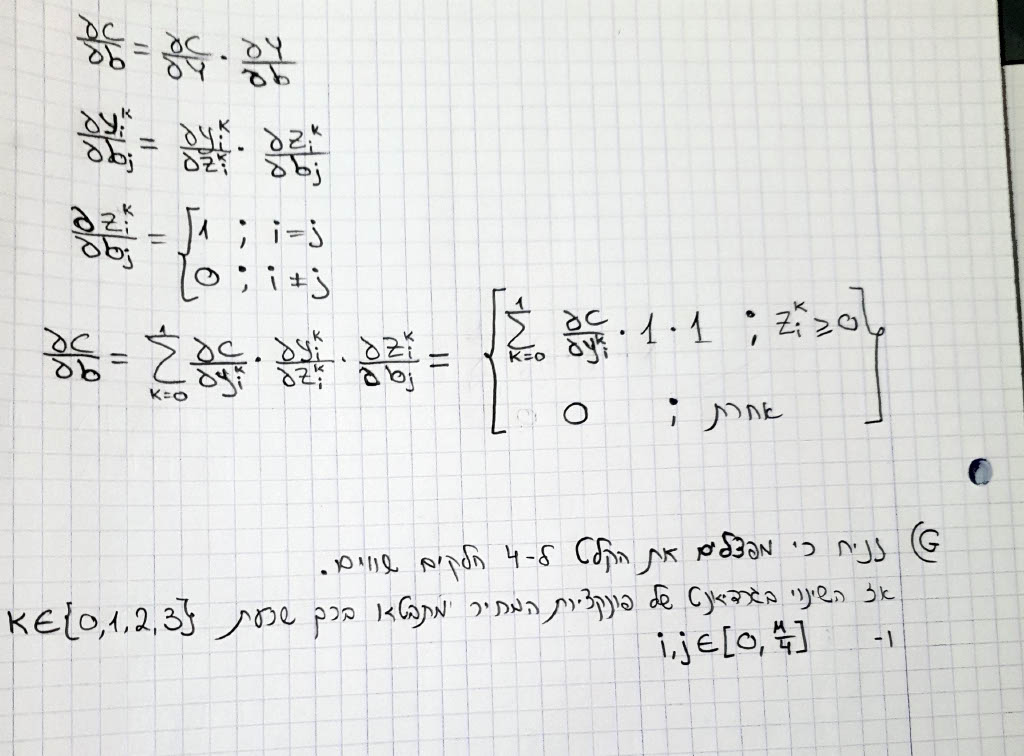

# **Q2: DropNorm Layer**
**Sections A, B, C:**

  Implement a network layer called DropNorm and use it for prediction in the following way:

**A:** implement the forward method in the training mode layer:
* The input is a Batch of samples.
* The layer will randomly select, for each feed forward in the network, exactly half of the features in the input tensor and reset them.
* The rest of the features will be normalized with the X_hat formula.
* Finally the output of the layer will be Y.

**B:**  Implement a constructor for this layer.

**C:**  Plan and Implement a move forward in the network in predictive mode.

In [ ]:
EPSILON = 0.001
NUM_OF_EPOCHS = 10
DROP_RATE = 0.5

In [ ]:
import tensorflow as tf

class DropNorm(nn.Module):

    def __init__(self, in_features):
        super().__init__()
        self.gamma = nn.Parameter(torch.ones(in_features))
        self.beta = nn.Parameter(torch.zeros(in_features))
        self.drop_rate = DROP_RATE

    def forward(self, input_batch):
        mu = input_batch.mean(dim=1)
        mu = torch.unsqueeze(mu, 1)

        sigma_squared = input_batch.var(dim=1)
        
        numerator = (input_batch - mu)

        denominator = torch.sqrt(sigma_squared + EPSILON)
        denominator = torch.unsqueeze(denominator, 1)

        X_hat = numerator / denominator

        y = self.gamma * X_hat + self.beta

        """ Depending on the layer's implementation in pyTorch,
            Instead of the familiar implementation:      {if self.training:
                                                            return X*mask
                                                          else:
                                                            return (1-self.drop_rate)*X
                                                          }

            We will implement it in the following way:    {if self.training:
                                                            return X*mask / (1-self.drop_rate)
                                                          else:
                                                            return X
                                                          }
            We do it because we will "waste" less time in training part.
            Because we trained the model once and then run the prediction many more times.
            Therefore prediction occurs much more often than training. """

        if self.training:  # training
       
          mask = input_batch > torch.median(input_batch)  # Assuming that the median value does not repeat itself.
          return (y * mask) / (1-self.drop_rate)    #   הסבר בהרצאה 4 בזמן: 1:56
     
        else:  # prediction
          #print('prediction prediction prediction prediction prediction')
          return y

# **Section D, E, F:**

**D:** Train a deep network for predicting clothing classes in the 'Fashion-MNIST' dataset:
* Use normalization layers and PyTorch's built-in Dropout layer.
* Training is performed using a GPU (if available).

**E:** Repeat section D, but this time use the DropNorm layer.

**F:**  Compare the results from sections D and E.

In [ ]:
''' Get available device, preferably GPU '''
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('Using device:', device)


Using device: cuda


In [ ]:
# load Fashion-MNIST dataset
trans = torchvision.transforms.Compose(
    [torchvision.transforms.PILToTensor(),
     torchvision.transforms.ConvertImageDtype(torch.float)])

train_data = torchvision.datasets.FashionMNIST(
      root="/FashionMNIST", train=True, download=True,
      transform=trans)

test_data = torchvision.datasets.FashionMNIST(
      root="/22961", train=False, download=True,
      transform=trans)

# create dataloader for train data and test data
train_dataloader = DataLoader(train_data, batch_size=512,
                              num_workers=1,shuffle=True,pin_memory=True)
test_dataloader = DataLoader(test_data, batch_size=len(test_data), pin_memory=True)

In [ ]:
# Create one model based on the layers I implemented (DropNorm), and another models based on the built-in layers of PyTorch (Dropout and LayerNorm).

def get_model(layers):
   if layers == 'my_layer':
        model = nn.Sequential(
          nn.Linear(784, 256),
          nn.ReLU(),
          DropNorm(256),
          nn.ReLU(),
          nn.Linear(256, 128),
          nn.ReLU(),
          DropNorm(128),
          nn.ReLU(),
          nn.Linear(128, 10),
          nn.LogSoftmax(dim=1)
      )
   elif layers == 'drop':
          model = nn.Sequential(
          nn.Linear(784, 256),
          nn.ReLU(),
          nn.Dropout(DROP_RATE),
          nn.ReLU(),
          nn.Linear(256, 128),
          nn.ReLU(),
          nn.Dropout(DROP_RATE),
          nn.ReLU(),
          nn.Linear(128, 10),
          nn.LogSoftmax(dim=1)
      ) 
   else:
          model = nn.Sequential(
          nn.Linear(784, 256),
          nn.ReLU(),
          nn.Dropout(DROP_RATE),
          nn.LayerNorm(256),
          nn.ReLU(),
          nn.Linear(256, 128),
          nn.ReLU(),
          nn.Dropout(DROP_RATE),
          nn.LayerNorm(128),
          nn.ReLU(),
          nn.Linear(128, 10),
          nn.LogSoftmax(dim=1)
      ) 
   return model.to(device)


In [ ]:
def train_network(MODEL):
    
    model = MODEL      
    CE_loss = nn.NLLLoss()  # Cross Entorpy = Negative Log Likelihood Loss .
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # lr is the learning rate used for both models' optimizers

    def iterate_batch(imgs, labels):  # Iteration of the training loop
        imgs = imgs.flatten(start_dim=1)  
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()  # Reset the gradient of the parameters
        #model.train()
        y_model = model(imgs)  # Entering the data into the network and calculating predicted probabilities
        loss = CE_loss(y_model, labels)  # Calculate the loss function on current minibatch.
        loss.backward()  # Calculation of the random gradient
        optimizer.step()  # update values of (Weights, bias)

        """ Let's convert the vector of probabilities into an unequivocal classification:
            We will use argmax(vector_probabilities) and assume that the model classifies each given sample to
            the class with the highest probability in its output """
        predicted_labels = y_model.argmax(dim=1)
        acc = (predicted_labels == labels).sum() / len(labels)  # acc = the proportion of samples that the model classifies correctly.
        return loss.detach(), acc.detach()

    def iterate_epoch():
        num_of_train_batches = len(train_dataloader)  # total number of batches = math.ceil(len(data_table)/BATCH_SIZE)
        running_loss = 0.
        running_acc = 0.

        for imgs, labels in train_dataloader:
            #model.train()
            batch_loss, batch_acc = iterate_batch(imgs, labels)
            running_loss += batch_loss
            running_acc += batch_acc
        loss = running_loss / num_of_train_batches
        acc = running_acc / num_of_train_batches
        return loss, acc

  
    loss_train = torch.zeros(NUM_OF_EPOCHS)  # Tensor of 0's in size = num_of_epochs
    acc_train = torch.zeros(NUM_OF_EPOCHS)  # Tensor of 0's in size = num_of_epochs
            
    for epoch_idx in range(NUM_OF_EPOCHS):
        loss_train[epoch_idx], acc_train[epoch_idx] = iterate_epoch()

    print(f'Results on train set:\n', f'\tloss = {loss_train}\n', f'\taccuracy = {acc_train}\n')      
 
    return loss_train, acc_train   

 

# **Section D:**

In [ ]:
# Train Deep NetWork based on the built-in layers of PyTorch (Dropout).

pytorch_model = get_model('drop')
torch_loss_train, torch_acc_train = train_network(pytorch_model)



Results on train set:
 	loss = tensor([2.2958, 2.2883, 2.2820, 2.2746, 2.2679, 2.2607, 2.2527, 2.2452, 2.2362,
        2.2267])
 	accuracy = tensor([0.1257, 0.1396, 0.1535, 0.1694, 0.1850, 0.1979, 0.2126, 0.2235, 0.2386,
        0.2500])



In [ ]:
# Train Deep NetWork based on the built-in layers of PyTorch (Dropout and LayerNorm).

pytorch_model_n = get_model('drop and norm')
torch_loss_train_n, torch_acc_train_n = train_network(pytorch_model_n)

Results on train set:
 	loss = tensor([2.2474, 1.9848, 1.8127, 1.6825, 1.5778, 1.4883, 1.4088, 1.3448, 1.2873,
        1.2345])
 	accuracy = tensor([0.1899, 0.3315, 0.4147, 0.4756, 0.5168, 0.5502, 0.5757, 0.5942, 0.6099,
        0.6281])



# **Section E:**

In [ ]:
#  Train Deep NetWork based on the layer I implemented (DropNorm).

my_model = get_model('my_layer')
my_loss_train, my_acc_train = train_network(my_model)

Results on train set:
 	loss = tensor([1.2555, 0.7702, 0.6576, 0.5992, 0.5606, 0.5334, 0.5124, 0.4949, 0.4817,
        0.4696])
 	accuracy = tensor([0.6220, 0.7640, 0.7907, 0.8049, 0.8142, 0.8215, 0.8272, 0.8317, 0.8347,
        0.8390])



# **Section F:**

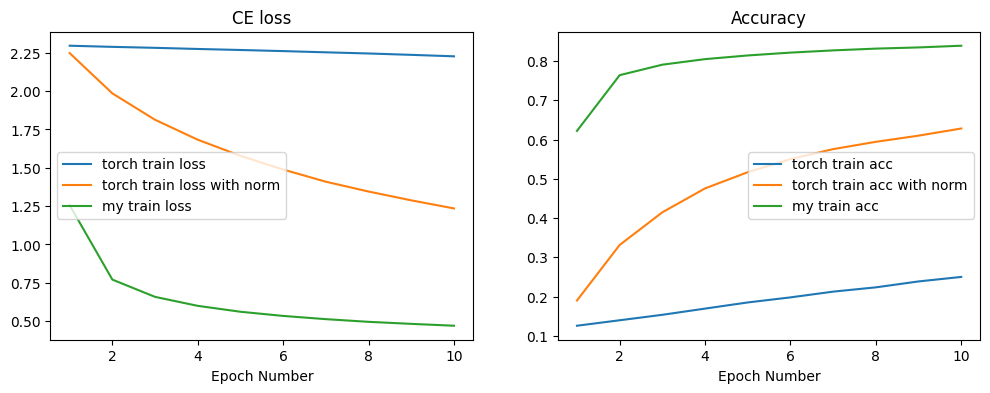

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, NUM_OF_EPOCHS + 1), torch_loss_train, label="torch train loss");
plt.plot(range(1, NUM_OF_EPOCHS + 1), torch_loss_train_n, label="torch train loss with norm");
plt.plot(range(1, NUM_OF_EPOCHS + 1), my_loss_train, label="my train loss");
plt.title("CE loss");
plt.legend()
plt.xlabel("Epoch Number");
plt.subplot(1, 2, 2)
plt.plot(range(1, NUM_OF_EPOCHS + 1), torch_acc_train, label="torch train acc");
plt.plot(range(1, NUM_OF_EPOCHS + 1), torch_acc_train_n, label="torch train acc with norm");
plt.plot(range(1, NUM_OF_EPOCHS + 1), my_acc_train, label="my train acc");
plt.title("Accuracy");
plt.legend()
plt.xlabel("Epoch Number");
plt.show()

In [ ]:
def test_model(MODEL): 
    model = MODEL
    CE_loss = nn.NLLLoss()  # Cross Entorpy = Negative Log Likelihood Loss .

    with torch.no_grad():
        # load test data
        imgs, labels = next(iter(test_dataloader))
        imgs = imgs.flatten(start_dim=1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        # evaluate model on test data 
        model.eval()
        y_model = model(imgs)
        loss = CE_loss(y_model, labels)
        predicted_labels = y_model.argmax(dim=1)
        acc = (predicted_labels == labels).sum()/len(labels)
    return loss, acc



my_test_loss1, my_test_acc1 = test_model(my_model)
print(f'Results on my test set:\n', f'\tmy_loss = {my_test_loss1}\n', f'\tmy_accuracy = {my_test_acc1}\n')

torch_test_loss1, torch_test_acc1 = test_model(pytorch_model)
print(f'Results on torch test set:\n', f'\ttorch_loss = {torch_test_loss1}\n', f'\ttorch_accuracy = {torch_test_acc1}\n')

torch_test_loss2, torch_test_acc2 = test_model(pytorch_model_n)
print(f'Results on torch test set _n:\n', f'\ttorch_loss_n = {torch_test_loss2}\n', f'\ttorch_accuracy_n = {torch_test_acc2}\n')

Results on my test set:
 	my_loss = 0.8090639710426331
 	my_accuracy = 0.8248999714851379

Results on torch test set:
 	torch_loss = 2.208474636077881
 	torch_accuracy = 0.4098999798297882

Results on torch test set _n:
 	torch_loss_n = 0.8307197093963623
 	torch_accuracy_n = 0.6949999928474426

